In [6]:
metric_path = '../Metrics/Results/gaussians.csv'

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [10]:
metric_df = pd.read_csv(metric_path, index_col=0)
metric_df

,spat_kendall,spat_kl,spat_nh_5,spat_nh_10,spat_nh_15,spat_nh_20,spat_np_5,spat_np_10,spat_np_15,spat_np_20,spat_pearson,spat_spearman,spat_stress_n,spat_stress_s,stab_kendall,stab_kl,stab_pearson,stab_spearman,stab_stress_n,stab_stress_s
./Output/gaussians-AE_10f_10f_2f_20ep.csv,0.253286,inf,0.924251,0.904243,0.616495,0.468577,0.457770,0.890302,0.633199,0.528033,0.210025,0.348198,0.368224,1.579951,0.705776,0.443071,0.640084,0.894015,0.712690,0.719833
./Output/gaussians-AE_10f_2f_20ep.csv,0.254036,0.252193,0.924251,0.904243,0.616495,0.468577,0.454937,0.881303,0.625979,0.520089,0.221233,0.348725,0.381046,1.557534,0.716211,0.347662,0.724679,0.898326,0.631422,0.550641
./Output/gaussians-dtsne_70p_0-1l.csv,0.199538,0.250971,0.924251,0.904243,0.616495,0.468577,0.601943,0.904231,0.641960,0.534281,0.152305,0.279223,0.824501,1.695390,0.694352,0.237730,0.811766,0.868227,0.478215,0.376469
./Output/gaussians-pca_s1.csv,0.364647,0.211509,0.924251,0.904243,0.616495,0.468577,0.443779,0.799244,0.601249,0.519331,0.431725,0.500119,0.335367,1.136550,0.739584,0.211201,0.808143,0.915608,0.396138,0.383713
./Output/gaussians-pca_s4.csv,0.362348,0.192345,0.924251,0.904243,0.616495,0.468577,0.449318,0.808629,0.601133,0.515791,0.443557,0.491605,0.296025,1.112887,0.790809,0.165721,0.841275,0.945271,0.398367,0.317449
./Output/gaussians-tsne_s1_70p.csv,0.112647,0.416248,0.924251,0.904243,0.616495,0.468577,0.585655,0.900800,0.637761,0.530466,-0.137100,0.134761,0.980187,2.274200,-0.077534,1.172581,-0.206478,-0.116913,2.593827,2.412957
./Output/gaussians-tsne_s4_70p.csv,0.302657,0.207163,0.924251,0.904243,0.616495,0.468577,0.433754,0.765363,0.580408,0.497998,0.257963,0.410201,0.537716,1.484074,-0.389636,1.815206,-0.035530,-0.509678,0.998424,2.071059


In [24]:
# KL metrics had some 
metric_df = metric_df.drop(['spat_kl', 'stab_kl'], axis=1)

In [25]:
def plot_matrix(matrix, metric_ids, dataset_ids, shared_cm=True, cell_text=False, invert_colormap=[], title=None, show=True):
    fig = plt.figure(figsize=(24,6))
    ax = fig.add_subplot(111)

    if shared_cm:
        # All column share same colormap range
        mat = ax.matshow(matrix, cmap=plt.cm.gist_yarg)
        if cell_text is False:
            fig.colorbar(mat, orientation="horizontal", pad=0.1)

    else:
        # The colormap range is independent for each column
        for i, metric in enumerate(metric_ids):
            # Make all rows invalid (fill with 1) except the target one (col)
            m = np.ones_like(matrix)
            m[:, i] = 0
            masked = np.ma.masked_array(matrix, m)
            if metric in invert_colormap:
                colormap = plt.cm.gist_yarg
            else:
                colormap = plt.cm.gist_gray
            ax.matshow(masked, cmap=colormap)

    # Ticks, labels and grids
    ax.set_xticklabels(metric_ids, rotation='vertical')
    ax.set_xticks(range(len(metric_ids)), minor=False)
    ax.set_yticklabels(dataset_ids)
    ax.set_yticks(range(len(dataset_ids)), minor=False)
    ax.set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor=True)
    ax.set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor=True)
    plt.grid(which='minor', color='#999999', linestyle='-', linewidth=1)
    ax.tick_params(axis=u'both', which=u'both', length=0)

    x_start = 0.0
    x_end = len(metric_ids)
    y_start = 0.0
    y_end = len(dataset_ids)

    # Add the text
    fontsize = 12
    if cell_text:
        jump_x = (x_end - x_start) / (2.0 * len(metric_ids))
        jump_y = (y_end - y_start) / (2.0 * len(dataset_ids))
        x_positions = np.linspace(start=x_start - 0.5, stop=x_end - 0.5, num=len(metric_ids), endpoint=False)
        y_positions = np.linspace(start=y_start - 0.5, stop=y_end - 0.5, num=len(dataset_ids), endpoint=False)

        for y_index, y in enumerate(y_positions):
            for x_index, x in enumerate(x_positions):
                label = "{0:.3f}".format(matrix[y_index][x_index])#.lstrip('0')
                text_x = x + jump_x
                text_y = y + jump_y
                color = 0
                if metric_ids[x_index] in invert_colormap:
                    color = not color
                    
                if matrix[y_index][x_index] < matrix[:, x_index].min() + (matrix[:, x_index].max() - matrix[:, x_index].min()) * .75:
                    color = not color
                color = 'white' if color else 'black' 
                ax.text(text_x, text_y, label, color=color, ha='center', va='center', fontsize=fontsize)

    fig.tight_layout()

#     if title is not None:
#         # ax.text(x_end / 2, y_end * 1.2, title, color='black', ha='center', va='center', fontsize=12)
#         ax.set_xlabel(title)

#         csv_name = Globals.plot_subdir + title.replace(' ', '').lower() + '.csv'
#         save_as_cvs(matrix, dataset_ids, technique_ids, csv_name)

#         fig_name = title.replace(' ', '').lower()
#         fig_name += '-S' if shared_cm else '-I'
#         fig_name += '-T' if cell_text else '-NT'
#         fig_name += '.png'
# #         fig.savefig(Globals.plot_subdir + fig_name, dpi=500)

    if show:
        plt.show()

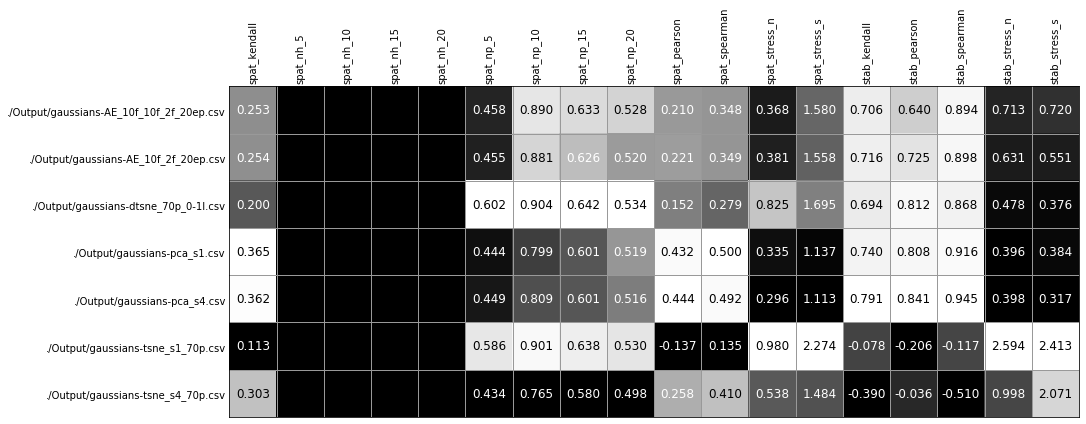

In [26]:
plot_matrix(metric_df.values, metric_df.columns, metric_df.index, 
            cell_text=True, shared_cm=False)#, invert_colormap=['kl', 'mse_n', 'mse_s'])
